### Run in collab
<a href="https://colab.research.google.com/github/racousin/data_science_practice/blob/master/website/public/modules/data-science-practice/module9/exercise/module9_exercise0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!apt-get install xvfb
!pip install 'swig==4.2.1'
!pip install 'box2d-py==2.3.8'
!pip install 'gymnasium[box2d,atari,accept-rom-license]==1.2.0'
!pip install 'pyvirtualdisplay==3.0'
!pip install 'opencv-python-headless'
!pip install imageio imageio-ffmpeg
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [2]:
!pip install 'gymnasium[box2d,atari,accept-rom-license]==1.2.0'

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import gymnasium as gym
from time import time,sleep
sns.set_style("darkgrid")

# module9_exercise0: Environment_and_Agent

### Introduction to Reinforcement Learning (RL)

In RL, we study the interaction between an **agent** and an **environment**. The agent takes actions to achieve a goal, guided by rewards from the environment. Our aim is to develop agents that can learn optimal behaviors through these interactions.



### Creating an Environment

An environment in RL defines the space in which the agent operates. It returns a new state and a reward for each action taken by the agent.

In [30]:
class Env:
    def __init__(self):
        self.state = np.random.randint(2)
        self.terminated = False

    def step(self, action):
        if (action % 2 == self.state):
            reward = 1
        else:
            reward = -1
        self.state = np.random.randint(2)
        return self.state, reward, self.terminated, False, {}

    def reset(self):
        self.state = np.random.randint(2)
        self.terminated = False
        return self.state

### Building an Agent
Agents in RL decide which actions to take in an environment. A simple agent might act randomly or follow a predetermined policy.



In [31]:
class Agent:
    def __init__(self, env):
        pass

    def act(self, state):
        return np.random.randint(2)

### Running an Experiment

To evaluate our agent's performance, we generate trajectories of state-action-reward sequences and compute the total reward.


In [32]:
def run_experiment(env, agent, nb_steps):
    state = env.reset()
    res = [state]
    for _ in range(nb_steps):
        action = agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        res += [action, reward, state]

    return res

## Understanding the Environment and Agent

**Question 1:** What is the **state space** in the provided `Env` class?
np.random.randint(2) donc (état binaire 0 ou 1)


**Question 2:** What is the **action space** in the provided `Env`/`Agent` class? np.random.randint(2) donc {0, 1} aussi


**Question 3:** What is the **Transition model** in the provided `Env` class? Is it a bandit environement? Après chaque action, le prochain état est ré-echantillonné uniformément et indépendant de St ou de l'action At. Oui, c'est un bandit au sens où il n'y a pas de dépendance séquentielle exploitable : chaque étape est indépendante, et la dynamique ne dépend pas de l'action. Plus précisément, c'est un bandit contextuel (le “contexte” est l'état St).


**Question 4:** What is the **Policy** in the provided `Agent` class?
np.random.randint(2) donc politique aléatoire uniforme, indépendante de l'état.

**Question 5:** What is the **Reward Function** in the provided `Env` class? La récompense dépend de la parité de l'action et de l'état courant : R(s, a) = 1 si a mod2 = s et sinon R(s, a) = -1.
(Puisque a = 0 ou 1, ça revient à : 1 si a = s, sinon -1.)


**Question 6:** What object **run_experiment** is returning?
run_experiment return une liste res qui contient la trajectoire "aplatie" sous la forme : [s0, a0, r0, s1, a1, r1, ...] (donc longueur = 1 + 3* nb_steps.)


**Exercise 1:** Instantiating the class `Agent` and `Env` to `run_experiment` on **100 steps**.



**Exercise 2:** Compute the **cumulative reward** and **discouted cumultative reward**, also known as the return value. You can return more information from `run_experiment` to help.


**Question 7:** In this `MDP`, what is the **Expected Return** when following the random policy of the `Agent`?
P(Rt = +1) = P(At = St) = 1/2,
P(Rt = -1) = 1/2.
Ainsi, E[Rt] = 1/2 - 1/2 = 0.


**Question 8:** what would be the **best policy** function for the `Env` environment?
Pour maximiser la récompense à chaque step, il suffit de choisir l'action qui "matche" l'état : pi*(s) = a = s.
c-à-d : si s = 1 on joue a = 1, si s = 0 on joue a = 0. Cette politique donne toujours Rt = +1 (car la réglé c'est +1 si a = s).
L'espérance de retour est E[somme des Rt] = T = horizon. Avec discount gamme, c'est (1 - gamma**T) / (1 - gamma).


**Exercise 3:** Implement the best policy function and use it to run the best agent. Compare its performance to the random agent.



In [33]:
# Instantiation
env = Env()
agent = Agent(env)
run_experiment(env, agent, 100)

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 -1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 0,
 -1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 -1,
 1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 -1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 0,
 1,
 -1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 0,
 0,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 -1,
 1,
 0,
 -1,
 1,
 0,
 -1,
 1,
 0,
 -1,
 1,
 0,
 -1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 0,
 0,
 1,
 1,
 0,

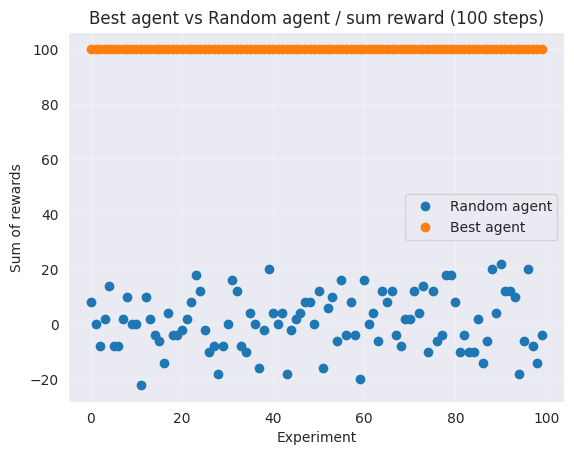

In [39]:
def best_policy(state):
    # Meilleure action = état (car reward = +1 ssi action == state)
    return state

class Best_Agent:
    def __init__(self, env):
        self.env = env

    def act(self, state):
        return best_policy(state)

# Instantiation
env = Env()
my_random_agent = Agent(env)
my_best_agent = Best_Agent(env)

def extract_rewards(run_output):
    """
    Compatible avec les 2 versions de run_experiment :
    - si run_experiment retourne (res, rewards) -> on prend rewards
    - si run_experiment retourne juste res -> on récupère les rewards via res[2::3]
      car res = [s0, a0, r0, s1, a1, r1, ...]
    """
    if isinstance(run_output, tuple) and len(run_output) == 2:
        return run_output[1]
    res = run_output
    return res[2::3]

nb_experiment = 100
sum_random_agent_rewards = []
sum_best_agent_rewards = []

for exp in range(nb_experiment):
    out_random = run_experiment(env, my_random_agent, nb_steps=100)
    random_agent_rewards = extract_rewards(out_random)

    out_best = run_experiment(env, my_best_agent, nb_steps=100)
    best_agent_rewards = extract_rewards(out_best)

    sum_random_agent_rewards.append(sum(random_agent_rewards))
    sum_best_agent_rewards.append(sum(best_agent_rewards))

plt.figure()
plt.plot(sum_random_agent_rewards, 'o', label="Random agent")
plt.plot(sum_best_agent_rewards, 'o', label="Best agent")
plt.title("Best agent vs Random agent / sum reward (100 steps)")
plt.xlabel("Experiment")
plt.ylabel("Sum of rewards")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



**Exercise 2:** Compute the **cumulative reward** and **discouted cumultative reward** also known as the return value for each step of the trajectory. Provide the **cumulative reward** and **discouted (0.8) cumultative reward** at step 42.  You can use the `rewards` return by `run_experiment` bellow to help.

In [36]:
def run_experiment(env, agent, nb_steps):
    state = env.reset()
    res = [state]
    rewards = []
    for _ in range(nb_steps):
        action = agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        res += [action, reward, state]
        rewards.append(reward)

    return res, rewards

In [37]:
def compute_cumulative_reward(rewards, discout_factor=1):
    cummulative_rewards = [0] * len(rewards)
    running = 0
    for t in reversed(range(len(rewards))):
        running = running * discout_factor + rewards[t]
        cummulative_rewards[t] = running
    return cummulative_rewards

In [38]:
_, rewards = run_experiment(env, agent, nb_steps=100)
print(compute_cumulative_reward(rewards)[42], compute_cumulative_reward(rewards, 0.8)[42])

4 1.5782445767445887


## Start with Gymnasium's Environment


In this section, we delve into the diverse range of environments offered by Gymnasium, which is recognized as the gold standard for defining reinforcement learning environments. Our exploration will provide insights into the dynamics of different systems and how they can be modeled and understood within the framework of reinforcement learning.

Execute the code below to initiate and observe experiments across various environments: **'FrozenLake-v1'**, **'CartPole-v1'**, **'LunarLanderContinuous-v3'**, and **'PongNoFrameskip-v4'**. While these experiments run, visit the Gymnasium documentation to acquaint yourself with the detailed characteristics and nuances of each environment.

In [42]:
from rl_introduction.rl_introduction.render_colab import exp_render
# Environments to run experiments on
env_render_configs = [{"name":'FrozenLake-v1', "fps":2, "nb_step":30},
 {"name":'CartPole-v1', "fps":17, "nb_step":120},
  {"name":'LunarLanderContinuous-v3', "fps":30, "nb_step":300},]
for env_render_config in env_render_configs:
  exp_render(env_render_config)

###Questions on Environment Dynamics
**Question 1:** Actions and States
For each environment (FrozenLake-v1, CartPole-v1, LunarLanderContinuous-v3, PongNoFrameskip-v4), identify the action space and state space. Specify whether each is discrete or continuous, and provide their sizes.

FrozenLake-v1:

Action Space: discete(4)
State Space: discete(16)


CartPole-v1:

Action Space: Discrete(2)
State Space: Box(..., (4,), float32)
(continu, vecteur de dimension 4)


LunarLanderContinuous-v3:

Action Space: Box(-1, +1, (2,), float32)
(continu, vecteur de dimension 2)
State Space: Box(..., (8,), float32)
(continu, vecteur de dimension 8)

PongNoFrameskip-v4:

Action Space:
State Space:

**Question 2:** Transition Models
For each environment, is the transition model deterministic or probabilistic?

FrozenLake-v1: Probabiliste par défaut (lac “slippery”). Devient déterministe si is_slippery=False

CartPole-v1: Déterministe dans la dynamique de step() (à état + action fixés, l'évolution est déterminée), mais reset initialise un état aléatoire.

LunarLanderContinuous-v3: Déterministe dans la physique pour un état+action donnés, mais l'épisode démarre avec une force initiale aléatoire (reset/starting state). Peut devenir plus “stochastique” si on active des options comme le wind/turbulence.

PongNoFrameskip-v4:

**Question 3:** Reward Functions
Define the reward function for each environment.

FrozenLake-v1: Récompense sparse : +1 si tu atteins la goal, 0 sinon (trou / case gelée).

CartPole-v1: Par défaut : +1 à chaque step (y compris le step terminal).

LunarLanderContinuous-v3: Reward “shaped” : augmente quand tu te rapproches de la zone d'atterrissage et que tu stabilises/vitesses faibles, pénalise inclinaison et consommation moteurs, +bonus contact des jambes, et +100 (atterrissage) / -100 (crash).

PongNoFrameskip-v4:

### Exercises on Agent Performance

**Exercise 1:** Running an Experiment

Instantiate a random agent along with the Gymnasium environment, and run the experiment until completion (terminated=True or truncated = True) for the following four environments: 'FrozenLake-v1', 'CartPole-v1', 'LunarLanderContinuous-v3', and 'PongNoFrameskip-v4'. Compute cumulative reward and number of step for each experiment.



In [43]:
import gymnasium as gym

In [44]:

class RandomAgent():
  def __init__(self, env):
    self.env = env

  def act(self, obs):
    return self.env.action_space.sample()

def run_experiment(env_name, max_steps=None):
  env = gym.make(env_name)
  agent = RandomAgent(env)

  obs, info = env.reset()
  terminated, truncated = False, False

  rewards = []
  nb_step = 0

  while not (terminated or truncated):
    action = agent.act(obs)
    obs, reward, terminated, truncated, info = env.step(action)

    rewards.append(reward)
    nb_step += 1

    if max_steps is not None and nb_step >= max_steps:
      break

  env.close()
  return rewards, nb_step

#env_names = ['FrozenLake-v1', 'CartPole-v1', 'LunarLanderContinuous-v3', 'PongNoFrameskip-v4']
env_names = ['FrozenLake-v1', 'CartPole-v1', 'LunarLanderContinuous-v3']

for env_name in env_names:
    rewards, nb_step = run_experiment(env_name)
    print(f"{env_name} cumulative reward: {sum(rewards)}, number steps: {nb_step}")


FrozenLake-v1 cumulative reward: 0.0, number steps: 6
CartPole-v1 cumulative reward: 19.0, number steps: 19
LunarLanderContinuous-v3 cumulative reward: -69.3492809444032, number steps: 119


**Exercise 2:** Running Experiments and compute cumulative reward
Conduct 20 experiments for each environment using a random agent. For each environement display the cumulative reward with a discount factor of 0.95.

In [46]:
gamma = 0.95
n_runs = 20
env_names = ['FrozenLake-v1', 'CartPole-v1', 'LunarLanderContinuous-v3']

def discounted_return(rewards, gamma=0.95):
    G = 0.0
    gpow = 1.0
    for r in rewards:
        G += gpow * r
        gpow *= gamma
    return G

for env_name in env_names:
    returns = []
    steps = []
    for _ in range(n_runs):
        rewards, nb_step = run_experiment(env_name)
        returns.append(discounted_return(rewards, gamma))
        steps.append(nb_step)

    print(f"\n{env_name}")
    print("Discounted returns (gamma=0.95):", returns)
    print(f"Mean return: {np.mean(returns):.3f} | Std: {np.std(returns):.3f} | Mean steps: {np.mean(steps):.1f}")


FrozenLake-v1
Discounted returns (gamma=0.95): [0.0, 0.0, 0.0, 0.0, 0.6983372960937497, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Mean return: 0.035 | Std: 0.152 | Mean steps: 8.6

CartPole-v1
Discounted returns (gamma=0.95): [17.42975686869792, 14.452208537563306, 17.680355573999872, 12.055713630835623, 12.45292794929384, 15.48128918014867, 13.852862645499512, 12.45292794929384, 9.733158334409895, 12.055713630835623, 14.72959811068514, 12.830281551829147, 10.734175396804929, 18.011194860258136, 13.18876747423769, 16.844415704235445, 16.678332320247836, 14.160219513224535, 12.45292794929384, 8.623998154470799]
Mean return: 13.795 | Std: 2.582 | Mean steps: 24.9

LunarLanderContinuous-v3
Discounted returns (gamma=0.95): [np.float64(-22.879672101201535), np.float64(-3.770820283914448), np.float64(-18.278372356752794), np.float64(-7.9594379246182445), np.float64(-8.067291811913824), np.float64(-28.019893711269418), np.float64(-24.033828026875224), np.floa